In [1]:
import os
os.chdir("../")
from pprint import pprint
import covsirphy as cs
cs.__version__

'2.8.3'

In [2]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)

In [4]:
'''Population Data'''
pop_data = cs.PopulationData(
    "/Users/elflee/jupyter-notebook/locations_population.csv"
)
pop_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
334,-,Vietnam,-,2020-10-19,95540000
335,-,West Bank and Gaza,-,2020-10-19,4776131
336,-,Western Sahara,-,2020-10-19,593611
337,-,Zambia,-,2020-10-19,17090000
338,-,Zimbabwe,-,2020-10-19,16530000


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv("/Users/elflee/jupyter-notebook/stringency and Rt.csv")

In [46]:
df.head()

,CountryCode,AUS-Stringency,AUS-Rt,CHN-Stringency,CHN-Rt,ITA-Stringency,ITA-Rt,JPN-Stringency,JPN-Rt,RUS-Stringency,RUS-Rt,SGP-Stringency,SGP-Rt
0,2020/1/1,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,2020/1/2,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,14,0.0
2,2020/1/3,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,14,0.0
3,2020/1/4,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,14,0.0
4,2020/1/5,0,0.0,3,0.0,0,0.0,0,0.0,0,0.0,14,0.0


In [47]:
x = df['CountryCode']
AUS_str= df['AUS-Stringency']
AUS_Rt= df['AUS-Rt']
CHN_str= df['CHN-Stringency']
CHN_Rt= df['CHN-Rt']
ITA_str= df['ITA-Stringency']
ITA_Rt= df['ITA-Rt']
JPN_str= df['JPN-Stringency']
JPN_Rt= df['JPN-Rt']
RUS_str= df['RUS-Stringency']
RUS_Rt= df['RUS-Rt']
SGP_str= df['SGP-Stringency']
SGP_Rt= df['SGP-Rt']

In [54]:
df = pd.read_csv("/Users/elflee/jupyter-notebook/simulate.csv")

# China

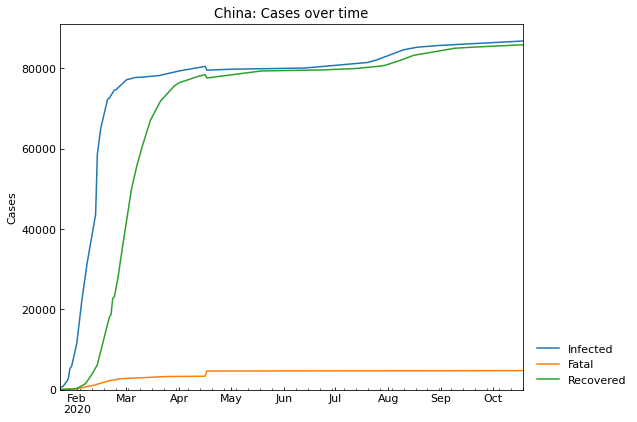

,Date,Confirmed,Infected,Fatal,Recovered
267,2020-10-15,91399,86653,4746,85743
268,2020-10-16,91436,86690,4746,85762
269,2020-10-17,91460,86714,4746,85791
270,2020-10-18,91490,86744,4746,85819
271,2020-10-19,91507,86761,4746,85819


In [5]:
chn_scenario = cs.Scenario(jhu_data, pop_data, "China")
chn_scenario.records().tail()

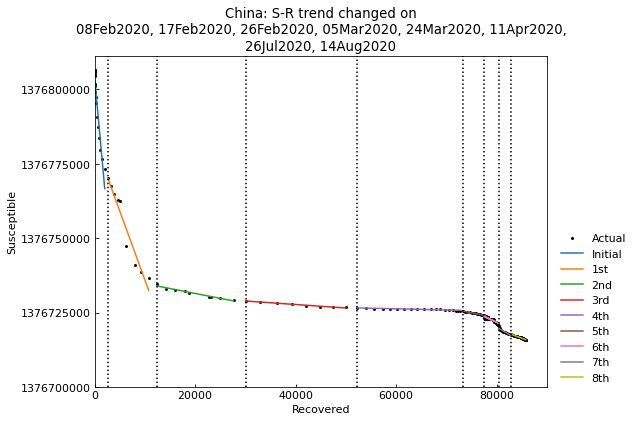

In [6]:
chn_scenario.trend()

In [7]:
chn_scenario.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	8th phase (14Aug2020 - 19Oct2020): finished  841 trials in 1 min 10 sec
Completed optimization. Total: 3 min 19 sec


In [8]:
chn_scenario.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,alpha1 [-],1/beta [day],1/gamma [day],1/alpha2 [day],RMSLE,Trials,Runtime
0th,Past,22Jan2020,07Feb2020,1376807262,SIR-F,45.66,0.024416,2.548520e-05,0.294014,0.006256,1440,0.024,3,159,39238,0.519869,924,1 min 0 sec
1st,Past,08Feb2020,16Feb2020,1376807262,SIR-F,3.97,0.031145,4.344152e-04,0.078382,0.018674,1440,0.031,12,53,2301,0.127557,938,1 min 0 sec
2nd,Past,17Feb2020,25Feb2020,1376807262,SIR-F,0.20,0.148882,5.709520e-04,0.006815,0.027756,1440,0.149,146,36,1751,0.112535,929,1 min 0 sec
3rd,Past,26Feb2020,04Mar2020,1376807262,SIR-F,0.09,0.127359,3.937280e-05,0.003961,0.037525,1440,0.127,252,26,25398,0.100557,938,1 min 0 sec
4th,Past,05Mar2020,23Mar2020,1376807262,SIR-F,0.04,0.173257,1.366866e-04,0.000667,0.014848,1440,0.173,1499,67,7316,0.154724,1123,1 min 0 sec
5th,Past,24Mar2020,10Apr2020,1376807262,SIR-F,0.45,0.024662,4.798183e-05,0.001193,0.002513,1440,0.025,838,397,20841,0.028659,390,0 min 20 sec
6th,Past,11Apr2020,25Jul2020,1376807262,SIR-F,0.50,0.240306,1.482672e-04,0.000295,0.000303,1440,0.240,3389,3299,6744,0.310878,1103,1 min 0 sec
7th,Past,26Jul2020,13Aug2020,1376807262,SIR-F,0.81,0.002287,2.129553e-05,0.001458,0.001777,1440,0.002,685,562,46958,0.023810,1130,1 min 0 sec
8th,Past,14Aug2020,19Oct2020,1376807262,SIR-F,0.21,0.548466,8.589119e-07,0.000249,0.000535,1440,0.548,4009,1870,1164263,0.155772,841,1 min 10 sec


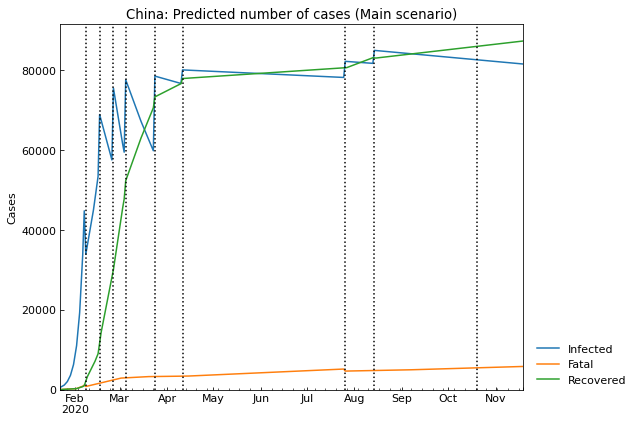

,Date,Confirmed,Fatal,Infected,Recovered
273,2020-10-21 00:00:00,174000,5490,82511,85999
274,2020-10-22 00:00:00,174021,5502,82476,86043
275,2020-10-23 00:00:00,174041,5513,82441,86087
276,2020-10-24 00:00:00,174062,5524,82407,86131
277,2020-10-25 00:00:00,174083,5536,82372,86175
278,2020-10-26 00:00:00,174103,5547,82337,86219
279,2020-10-27 00:00:00,174123,5558,82302,86263
280,2020-10-28 00:00:00,174144,5570,82267,86307
281,2020-10-29 00:00:00,174164,5581,82232,86351
282,2020-10-30 00:00:00,174185,5592,82198,86395


In [39]:
chn_scenario.clear()
chn_scenario.add(days=30)
chn_scenario.simulate().tail(30).style.background_gradient(axis=0)

Text(0, 0.5, 'Number')

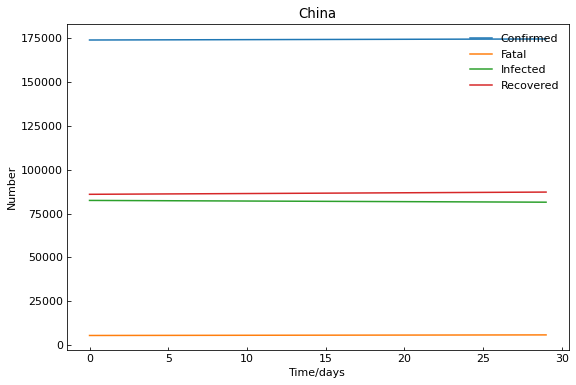

In [55]:
plt.plot(df['chn_confirmed'],label="Confirmed")
plt.plot(df['chn_fatal'],label="Fatal")
plt.plot(df['chn_infected'],label="Infected")
plt.plot(df['chn_recovered'],label="Recovered")
plt.legend(loc="best")
plt.title("China")
plt.xlabel("Time/days")
plt.ylabel("Number")
#plt.yscale("log")

(0.028131066381076007, 100)

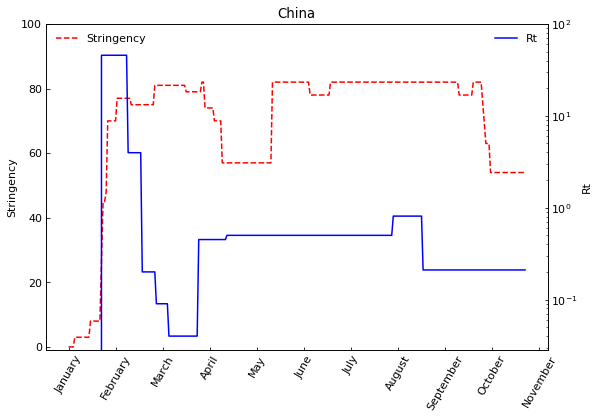

In [48]:
fig,left_axis=plt.subplots()
p1, =left_axis.plot(CHN_str,"--",label="Stringency", color="red")
plt.xticks([0, 30, 60,90,120,150,180,210,240,270,300],['January', 'February', 'March','April','May','June','July','August','September','October','November'],rotation=60)
plt.legend(loc='upper left')
ax = plt.gca()
right_axis=left_axis.twinx()
#plt.plot(x_series, AUS_str,label="Stringency", color="red")
#plt.plot(x_series, AUS_Rt, label="Rt", color="blue")
p2, =right_axis.plot(CHN_Rt,label="Rt", color="blue")
plt.legend(loc='upper right')
ax = plt.gca()
plt.title("China")
left_axis.set_ylabel('Stringency')
left_axis.set_ylim(-1,100)
right_axis.set_ylabel('Rt')
right_axis.set_yscale("log")
right_axis.set_ylim(0,100)

# Japan

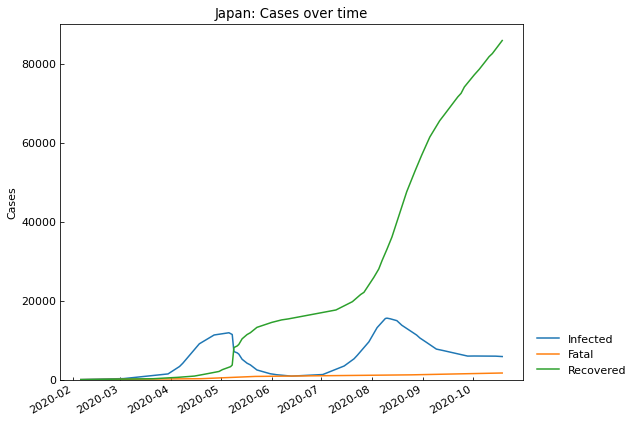

,Date,Confirmed,Infected,Fatal,Recovered
249,2020-10-15,91413,5948,1649,83816
250,2020-10-16,92053,5960,1664,84429
251,2020-10-17,92677,5995,1670,85012
252,2020-10-18,93108,5968,1674,85466
253,2020-10-19,93426,5849,1676,85901


In [9]:
jpn_scenario = cs.Scenario(jhu_data, pop_data, "Japan")
jpn_scenario.records().tail()

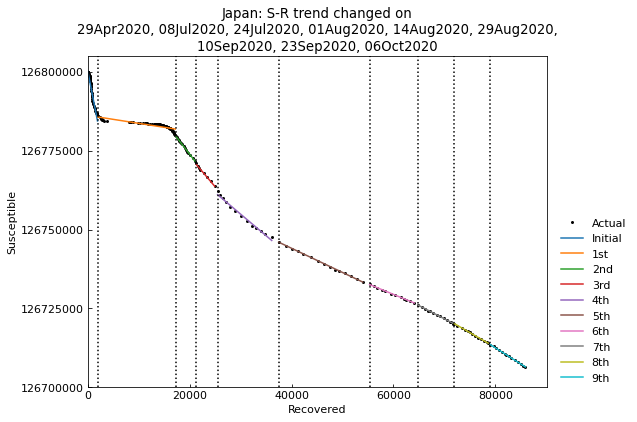

In [10]:
jpn_scenario.trend()

In [11]:
jpn_scenario.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	9th phase (06Oct2020 - 19Oct2020): finished  851 trials in 0 min 40 sec
Completed optimization. Total: 2 min 48 sec


In [12]:
jpn_scenario.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
0th,Past,06Feb2020,28Apr2020,126800000,SIR-F,9.87,0.041518,0.000079,0.004989,0.000406,90,0.042,790,12,154,3.142256,824,1 min 0 sec
1st,Past,29Apr2020,07Jul2020,126800000,SIR-F,0.24,0.034965,0.000112,0.001185,0.004581,90,0.035,557,52,13,1.269578,862,1 min 0 sec
2nd,Past,08Jul2020,23Jul2020,126800000,SIR-F,2.12,0.000149,0.000002,0.008924,0.004210,90,0.000,34571,7,14,0.030683,987,1 min 0 sec
3rd,Past,24Jul2020,31Jul2020,126800000,SIR-F,2.12,0.000920,0.000037,0.007832,0.003649,90,0.001,1693,7,17,0.019391,1011,1 min 0 sec
4th,Past,01Aug2020,13Aug2020,126800000,SIR-F,1.68,0.000943,0.000031,0.005943,0.003512,90,0.001,2000,10,17,0.054646,1231,1 min 0 sec
5th,Past,14Aug2020,28Aug2020,126800000,SIR-F,0.70,0.005555,0.000039,0.004181,0.005869,90,0.006,1591,14,10,0.054333,525,0 min 30 sec
6th,Past,29Aug2020,09Sep2020,126800000,SIR-F,0.62,0.010642,0.000059,0.003965,0.006294,90,0.011,1056,15,9,0.050509,626,0 min 35 sec
7th,Past,10Sep2020,22Sep2020,126800000,SIR-F,0.73,0.000771,0.000098,0.004321,0.005847,90,0.001,637,14,10,0.065029,372,0 min 20 sec
8th,Past,23Sep2020,05Oct2020,126800000,SIR-F,0.89,0.000408,0.000087,0.005103,0.005616,90,0.000,719,12,11,0.022567,428,0 min 20 sec
9th,Past,06Oct2020,19Oct2020,126800000,SIR-F,1.00,0.000124,0.000080,0.005390,0.005310,90,0.000,781,11,11,0.014843,851,0 min 40 sec


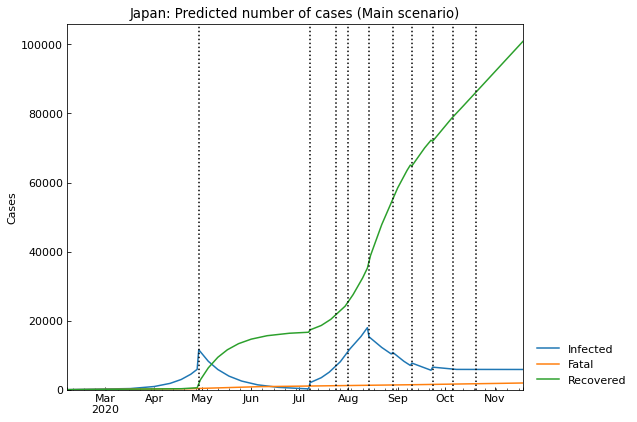

,Date,Confirmed,Fatal,Infected,Recovered
258,2020-10-21 00:00:00,94125,1724,5871,86530
259,2020-10-22 00:00:00,94630,1731,5870,87029
260,2020-10-23 00:00:00,95136,1739,5870,87527
261,2020-10-24 00:00:00,95641,1746,5869,88026
262,2020-10-25 00:00:00,96148,1754,5869,88525
263,2020-10-26 00:00:00,96652,1761,5868,89023
264,2020-10-27 00:00:00,97159,1769,5868,89522
265,2020-10-28 00:00:00,97664,1777,5867,90020
266,2020-10-29 00:00:00,98170,1784,5867,90519
267,2020-10-30 00:00:00,98675,1792,5866,91017


In [40]:
jpn_scenario.clear()
jpn_scenario.add(days=30)
jpn_scenario.simulate().tail(30).style.background_gradient(axis=0)

Text(0, 0.5, 'Number')

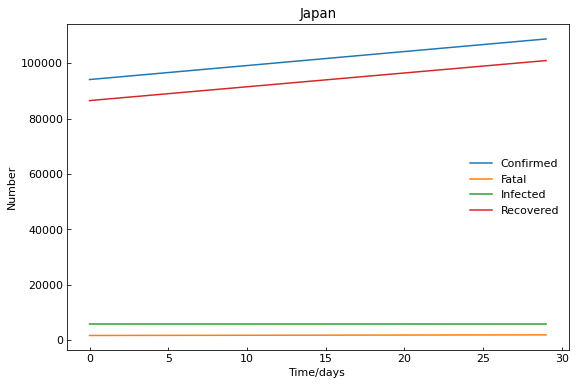

In [56]:
plt.plot(df['jpn_confirmed'],label="Confirmed")
plt.plot(df['jpn_fatal'],label="Fatal")
plt.plot(df['jpn_infected'],label="Infected")
plt.plot(df['jpn_recovered'],label="Recovered")
plt.legend(loc="best")
plt.title("Japan")
plt.xlabel("Time/days")
plt.ylabel("Number")
#plt.yscale("log")

(0.19929937931479133, 100)

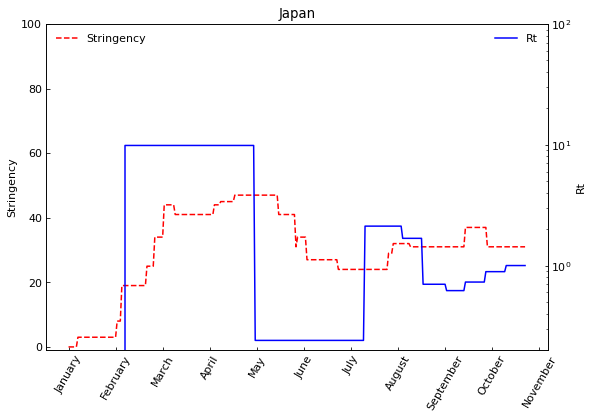

In [49]:
fig,left_axis=plt.subplots()
p1, =left_axis.plot(JPN_str,"--",label="Stringency", color="red")
plt.xticks([0, 30, 60,90,120,150,180,210,240,270,300],['January', 'February', 'March','April','May','June','July','August','September','October','November'],rotation=60)
plt.legend(loc='upper left')
right_axis=left_axis.twinx()
#plt.plot(x_series, AUS_str,label="Stringency", color="red")
#plt.plot(x_series, AUS_Rt, label="Rt", color="blue")
p2, =right_axis.plot(JPN_Rt,label="Rt", color="blue")
plt.legend(loc='upper right')
plt.title("Japan")
left_axis.set_ylabel('Stringency')
left_axis.set_ylim(-1,100)
right_axis.set_ylabel('Rt')
right_axis.set_yscale("log")
right_axis.set_ylim(0,100)

# Italy

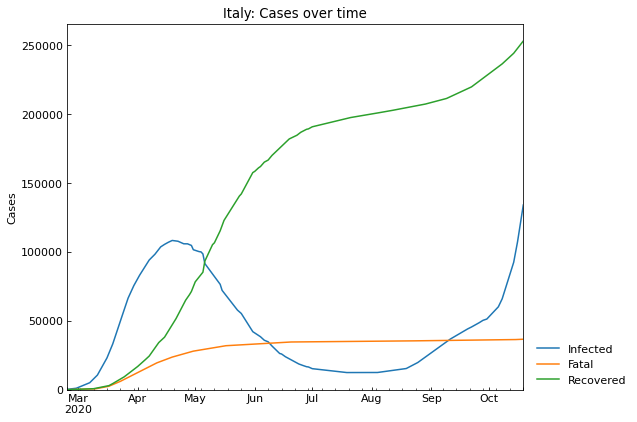

,Date,Confirmed,Infected,Fatal,Recovered
234,2020-10-15,381602,99266,36372,245964
235,2020-10-16,391611,107312,36427,247872
236,2020-10-17,402536,116935,36474,249127
237,2020-10-18,414241,126237,36543,251461
238,2020-10-19,423578,134003,36616,252959


In [13]:
ita_scenario = cs.Scenario(jhu_data, pop_data, "Italy")
ita_scenario.records().tail()

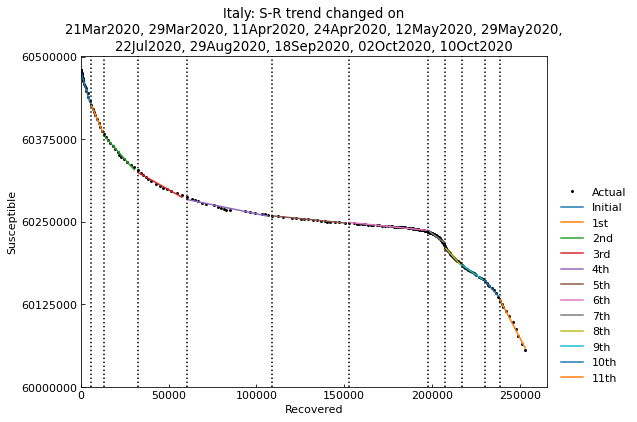

In [14]:
ita_scenario.trend()

In [15]:
ita_scenario.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	11th phase (10Oct2020 - 19Oct2020): finished 1322 trials in 1 min  0 sec
Completed optimization. Total: 3 min 58 sec


In [16]:
ita_scenario.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/alpha2 [day],1/gamma [day],alpha1 [-],1/beta [day],RMSLE,Trials,Runtime
0th,Past,24Feb2020,20Mar2020,60480000,SIR-F,21.26,0.054445,0.000024,0.056749,0.002500,360,10346,100,0.054,4,1.642268,1006,1 min 0 sec
1st,Past,21Mar2020,28Mar2020,60480000,SIR-F,4.52,0.095008,0.001073,0.024347,0.003797,360,232,65,0.095,10,0.023402,1024,1 min 0 sec
2nd,Past,29Mar2020,10Apr2020,60480000,SIR-F,2.36,0.122677,0.000622,0.012734,0.004110,360,401,60,0.123,19,0.029113,1012,1 min 0 sec
3rd,Past,11Apr2020,23Apr2020,60480000,SIR-F,1.46,0.067737,0.000706,0.007874,0.004326,360,354,57,0.068,31,0.024397,1024,1 min 0 sec
4th,Past,24Apr2020,11May2020,60480000,SIR-F,0.47,0.218546,0.000025,0.003517,0.005839,360,9971,42,0.219,71,0.052791,921,1 min 0 sec
5th,Past,12May2020,28May2020,60480000,SIR-F,0.23,0.116127,0.000246,0.002588,0.009710,360,1017,25,0.116,96,0.015761,635,0 min 40 sec
6th,Past,29May2020,21Jul2020,60480000,SIR-F,0.24,0.080326,0.000246,0.002606,0.009893,360,1017,25,0.080,95,0.171090,613,0 min 40 sec
7th,Past,22Jul2020,28Aug2020,60480000,SIR-F,1.45,0.016643,0.000122,0.005908,0.003884,360,2042,64,0.017,42,0.157087,915,1 min 0 sec
8th,Past,29Aug2020,17Sep2020,60480000,SIR-F,2.70,0.001444,0.000054,0.011049,0.004031,360,4601,62,0.001,22,0.044619,188,0 min 10 sec
9th,Past,18Sep2020,01Oct2020,60480000,SIR-F,1.74,0.001563,0.000096,0.009265,0.005208,360,2595,47,0.002,26,0.007565,283,0 min 15 sec


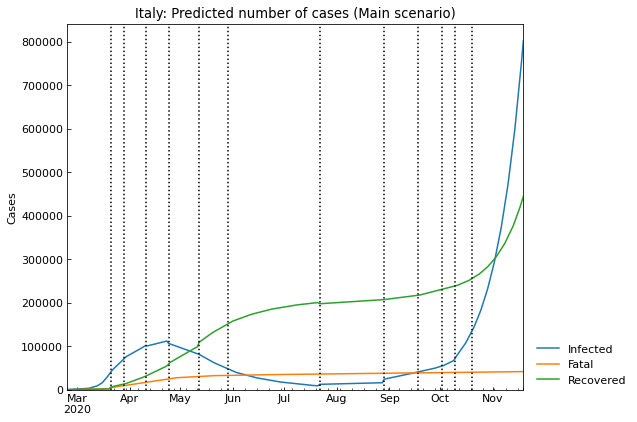

,Date,Confirmed,Fatal,Infected,Recovered
240,2020-10-21 00:00:00,438812,36655,144185,257972
241,2020-10-22 00:00:00,450210,36721,153033,260456
242,2020-10-23 00:00:00,462305,36791,162422,263092
243,2020-10-24 00:00:00,475138,36865,172384,265889
244,2020-10-25 00:00:00,488755,36943,182953,268859
245,2020-10-26 00:00:00,503204,37027,194167,272010
246,2020-10-27 00:00:00,518535,37115,206065,275355
247,2020-10-28 00:00:00,534802,37209,218689,278904
248,2020-10-29 00:00:00,552065,37309,232083,282673
249,2020-10-30 00:00:00,570380,37415,246292,286673


In [38]:
ita_scenario.clear()
ita_scenario.add(days=30)
ita_scenario.simulate().tail(30).style.background_gradient(axis=0)

Text(0, 0.5, 'Number')

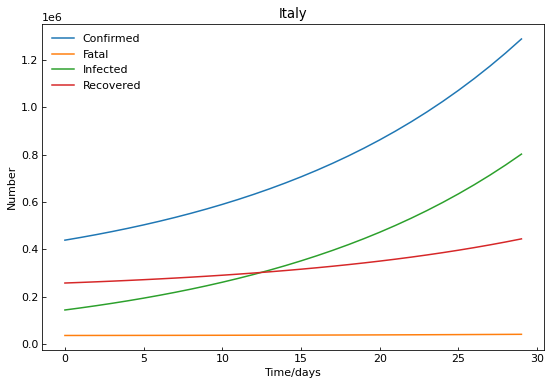

In [57]:
plt.plot(df['ita_confirmed'],label="Confirmed")
plt.plot(df['ita_fatal'],label="Fatal")
plt.plot(df['ita_infected'],label="Infected")
plt.plot(df['ita_recovered'],label="Recovered")
plt.legend(loc="best")
plt.title("Italy")
plt.xlabel("Time/days")
plt.ylabel("Number")
#plt.yscale("log")

(0.18341551298608247, 100)

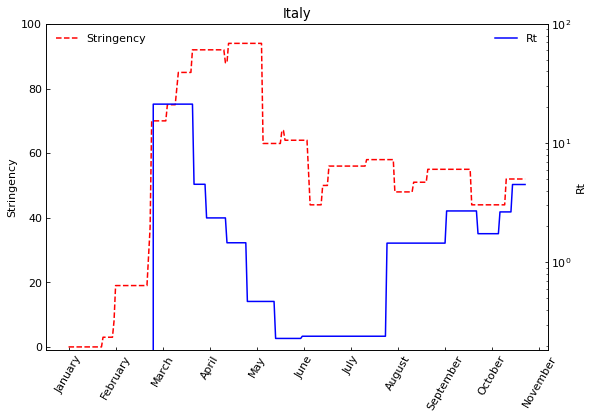

In [50]:
fig,left_axis=plt.subplots()
p1, =left_axis.plot(ITA_str,"--",label="Stringency", color="red")
plt.xticks([0, 30, 60,90,120,150,180,210,240,270,300],['January', 'February', 'March','April','May','June','July','August','September','October','November'],rotation=60)
plt.legend(loc='upper left')
right_axis=left_axis.twinx()
#plt.plot(x_series, AUS_str,label="Stringency", color="red")
#plt.plot(x_series, AUS_Rt, label="Rt", color="blue")
p2, =right_axis.plot(ITA_Rt,label="Rt", color="blue")
plt.legend(loc='upper right')
plt.title("Italy")
left_axis.set_ylabel('Stringency')
left_axis.set_ylim(-1,100)
right_axis.set_ylabel('Rt')
right_axis.set_yscale("log")
right_axis.set_ylim(0,100)

# Australia

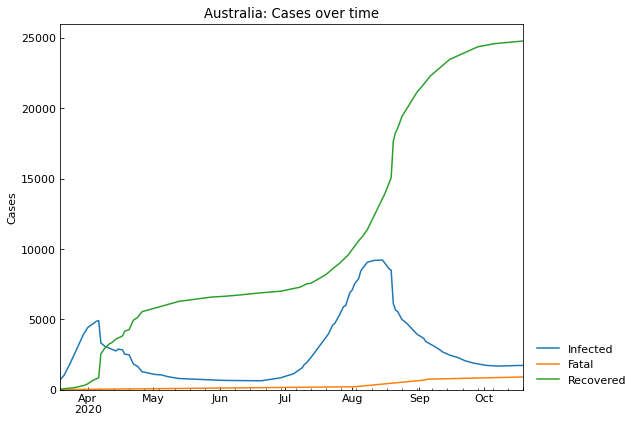

,Date,Confirmed,Infected,Fatal,Recovered
210,2020-10-15,27362,1736,904,24722
211,2020-10-16,27371,1718,904,24749
212,2020-10-17,27383,1721,904,24758
213,2020-10-18,27391,1719,904,24768
214,2020-10-19,27399,1722,905,24772


In [17]:
aus_scenario = cs.Scenario(jhu_data, pop_data, "Australia")
aus_scenario.records().tail()

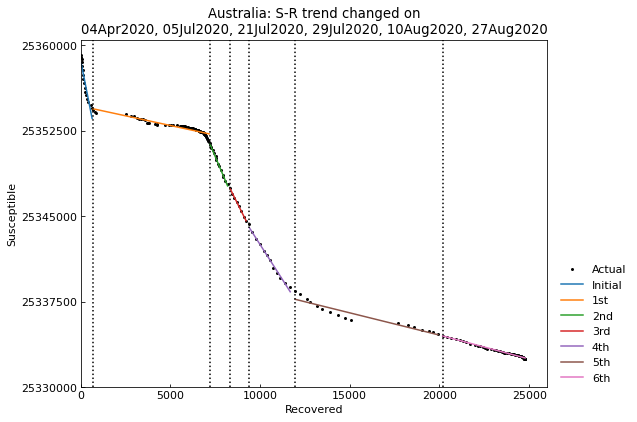

In [18]:
aus_scenario.trend()

In [19]:
aus_scenario.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	6th phase (27Aug2020 - 19Oct2020): finished  819 trials in 1 min  0 sec
Completed optimization. Total: 3 min  8 sec


In [20]:
aus_scenario.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,alpha1 [-],1/gamma [day],1/alpha2 [day],1/beta [day],RMSLE,Trials,Runtime
0th,Past,19Mar2020,03Apr2020,25359862,SIR-F,10.51,0.000233,0.000453,0.084516,0.007586,720,0.000,65,1104,5,0.299175,954,1 min 0 sec
1st,Past,04Apr2020,04Jul2020,25359862,SIR-F,0.36,0.038337,0.000039,0.006119,0.016163,720,0.038,30,12699,81,1.619931,916,1 min 0 sec
2nd,Past,05Jul2020,20Jul2020,25359862,SIR-F,4.02,0.000663,0.000255,0.053422,0.013025,720,0.001,38,1963,9,0.042917,831,0 min 50 sec
3rd,Past,21Jul2020,28Jul2020,25359862,SIR-F,2.94,0.001407,0.000541,0.038560,0.012534,720,0.001,39,924,12,0.024801,952,1 min 0 sec
4th,Past,29Jul2020,09Aug2020,25359862,SIR-F,2.58,0.015844,0.000115,0.037118,0.014045,720,0.016,35,4362,13,0.030157,1368,1 min 0 sec
5th,Past,10Aug2020,26Aug2020,25359862,SIR-F,0.46,0.060705,0.000105,0.014027,0.028513,720,0.061,17,4766,35,0.140046,1454,1 min 0 sec
6th,Past,27Aug2020,19Oct2020,25359862,SIR-F,0.29,0.184246,0.000234,0.006922,0.019334,720,0.184,25,2133,72,0.292368,819,1 min 0 sec


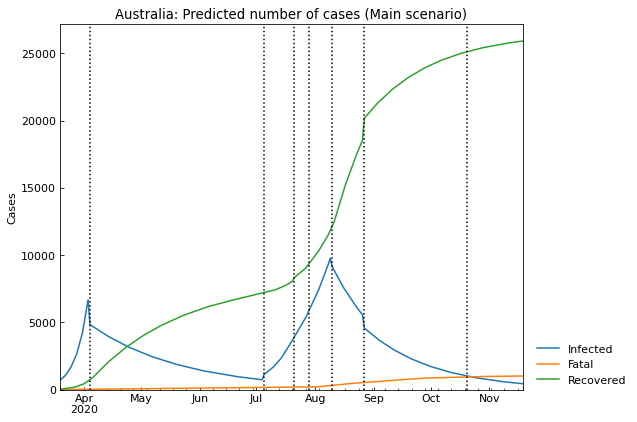

,Date,Confirmed,Fatal,Infected,Recovered
216,2020-10-21 00:00:00,27102,959,990,25153
217,2020-10-22 00:00:00,27116,962,963,25191
218,2020-10-23 00:00:00,27128,965,936,25227
219,2020-10-24 00:00:00,27142,968,911,25263
220,2020-10-25 00:00:00,27154,970,886,25298
221,2020-10-26 00:00:00,27166,973,861,25332
222,2020-10-27 00:00:00,27178,976,838,25364
223,2020-10-28 00:00:00,27189,978,815,25396
224,2020-10-29 00:00:00,27199,980,792,25427
225,2020-10-30 00:00:00,27212,983,771,25458


In [41]:
aus_scenario.clear()
aus_scenario.add(days=30)
aus_scenario.simulate().tail(30).style.background_gradient(axis=0)

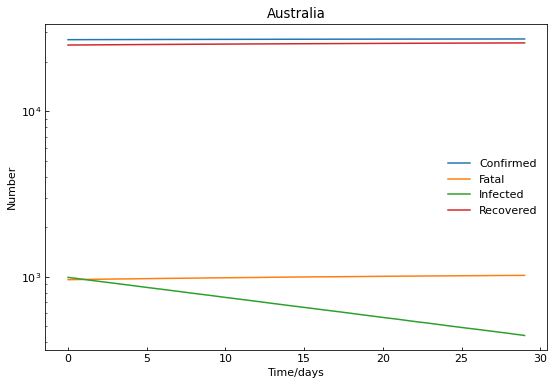

In [58]:
plt.plot(df['aus_confirmed'],label="Confirmed")
plt.plot(df['aus_fatal'],label="Fatal")
plt.plot(df['aus_infected'],label="Infected")
plt.plot(df['aus_recovered'],label="Recovered")
plt.legend(loc="best")
plt.title("Australia")
plt.xlabel("Time/days")
plt.ylabel("Number")
plt.yscale("log")

(0.2423470636190606, 100)

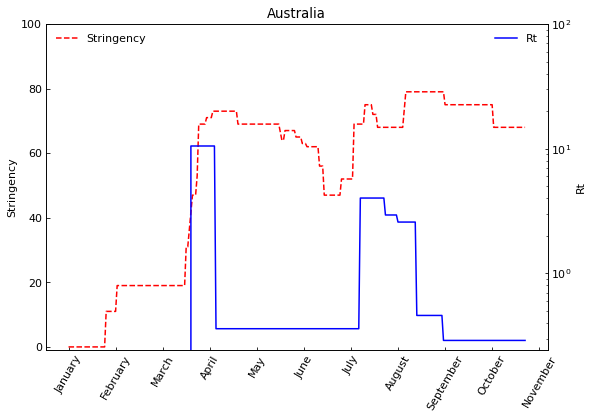

In [51]:
fig,left_axis=plt.subplots()
p1, =left_axis.plot(AUS_str, "--", label="Stringency",color="red")
plt.xticks([0, 30, 60,90,120,150,180,210,240,270,300],['January', 'February', 'March','April','May','June','July','August','September','October','November'],rotation=60)
plt.legend(loc='upper left')
right_axis=left_axis.twinx()
#plt.plot(x_series, AUS_str,label="Stringency", color="red")
#plt.plot(x_series, AUS_Rt, label="Rt", color="blue")
p2, =right_axis.plot(AUS_Rt,label="Rt", color="blue")
plt.legend(loc='upper right')
plt.title("Australia")
left_axis.set_ylabel('Stringency')
left_axis.set_ylim(-1,100)
right_axis.set_ylabel('Rt')
right_axis.set_yscale("log")
right_axis.set_ylim(-1,100)

# Singapore

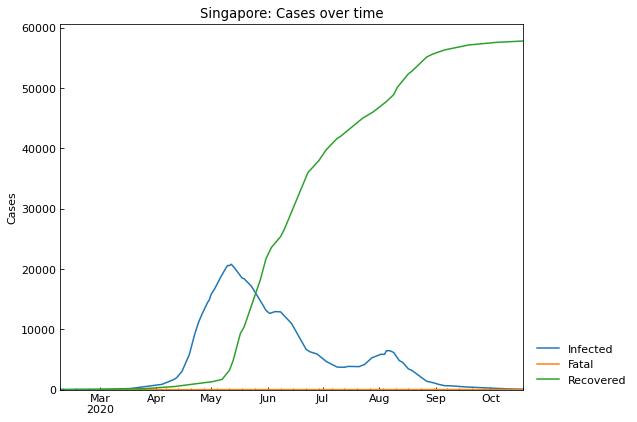

,Date,Confirmed,Infected,Fatal,Recovered
250,2020-10-15,57892,100,28,57764
251,2020-10-16,57901,89,28,57784
252,2020-10-17,57904,78,28,57798
253,2020-10-18,57911,76,28,57807
254,2020-10-19,57911,76,28,57807


In [21]:
sgp_scenario = cs.Scenario(jhu_data, pop_data, "Singapore")
sgp_scenario.records().tail()

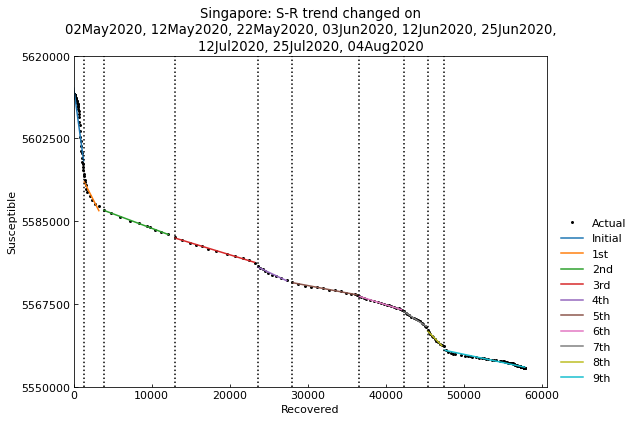

In [22]:
sgp_scenario.trend()

In [23]:
sgp_scenario.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	9th phase (04Aug2020 - 19Oct2020): finished  748 trials in 1 min 16 sec
Completed optimization. Total: 4 min 25 sec


In [24]:
sgp_scenario.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/gamma [day],1/beta [day],alpha1 [-],1/alpha2 [day],RMSLE,Trials,Runtime
0th,Past,08Feb2020,01May2020,5612000,SIR-F,0.02,0.675899,0.888292,0.065920,0.023285,1440,42,15,0.676,1,15.426249,811,1 min 1 sec
1st,Past,02May2020,11May2020,5612000,SIR-F,3.22,0.001093,0.000010,0.037619,0.011669,1440,85,26,0.001,96379,0.151263,961,1 min 0 sec
2nd,Past,12May2020,21May2020,5612000,SIR-F,0.55,0.000096,0.000002,0.028490,0.051836,1440,19,35,0.000,552407,0.034217,955,1 min 0 sec
3rd,Past,22May2020,02Jun2020,5612000,SIR-F,0.49,0.000679,0.000021,0.032834,0.066855,1440,14,30,0.001,47041,0.117712,958,1 min 0 sec
4th,Past,03Jun2020,11Jun2020,5612000,SIR-F,1.07,0.000097,0.000002,0.029857,0.027926,1440,35,33,0.000,552952,0.029579,875,1 min 0 sec
5th,Past,12Jun2020,24Jun2020,5612000,SIR-F,0.35,0.000096,0.000002,0.029986,0.085674,1440,11,33,0.000,552396,0.037383,867,1 min 0 sec
6th,Past,25Jun2020,11Jul2020,5612000,SIR-F,0.46,0.000975,0.000004,0.037986,0.081884,1440,12,26,0.001,273151,0.119454,871,1 min 0 sec
7th,Past,12Jul2020,24Jul2020,5612000,SIR-F,1.13,0.000659,0.000037,0.076175,0.067034,1440,14,13,0.001,27084,0.048421,869,1 min 0 sec
8th,Past,25Jul2020,03Aug2020,5612000,SIR-F,1.57,0.000019,0.000041,0.059099,0.037601,1440,26,16,0.000,24543,0.063857,1563,1 min 0 sec
9th,Past,04Aug2020,19Oct2020,5612000,SIR-F,0.45,0.000120,0.000022,0.053889,0.119747,1440,8,18,0.000,46184,0.876203,748,1 min 16 sec


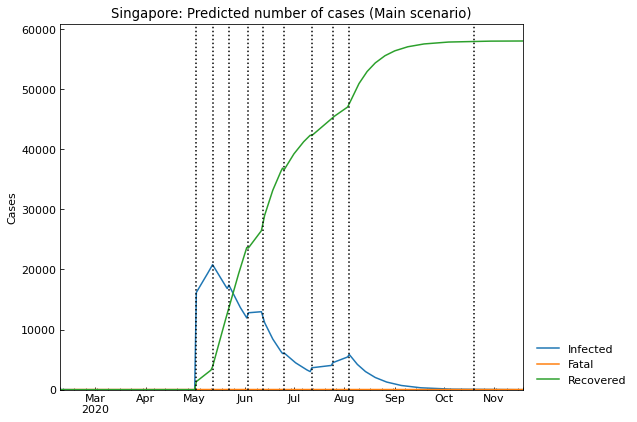

,Date,Confirmed,Fatal,Infected,Recovered
256,2020-10-21 00:00:00,58030,29,33,57968
257,2020-10-22 00:00:00,58032,29,31,57972
258,2020-10-23 00:00:00,58033,29,29,57975
259,2020-10-24 00:00:00,58035,29,27,57979
260,2020-10-25 00:00:00,58036,29,25,57982
261,2020-10-26 00:00:00,58037,29,23,57985
262,2020-10-27 00:00:00,58039,29,22,57988
263,2020-10-28 00:00:00,58040,29,21,57990
264,2020-10-29 00:00:00,58040,29,19,57992
265,2020-10-30 00:00:00,58042,29,18,57995


In [42]:
sgp_scenario.clear()
sgp_scenario.add(days=30)
sgp_scenario.simulate().tail(30).style.background_gradient(axis=0)

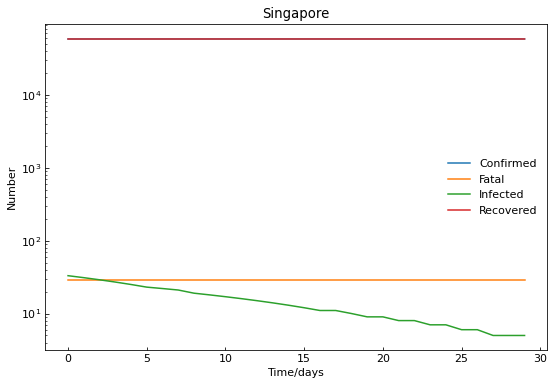

In [59]:
plt.plot(df['sgp_confirmed'],label="Confirmed")
plt.plot(df['sgp_fatal'],label="Fatal")
plt.plot(df['sgp_infected'],label="Infected")
plt.plot(df['sgp_recovered'],label="Recovered")
plt.legend(loc="best")
plt.title("Singapore")
plt.xlabel("Time/days")
plt.ylabel("Number")
plt.yscale("log")

(0.01551274672476938, 100)

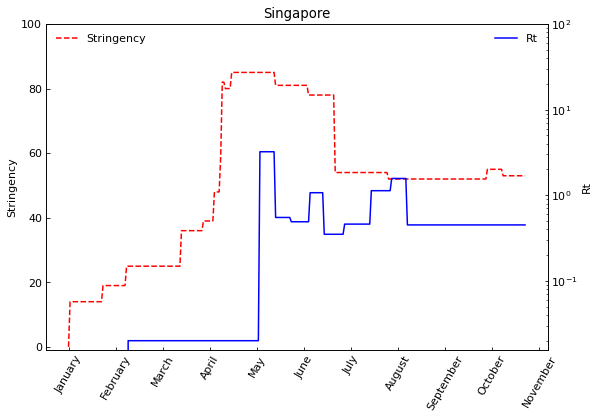

In [52]:
fig,left_axis=plt.subplots()
p1, =left_axis.plot(SGP_str,"--",label="Stringency", color="red")
plt.xticks([0, 30, 60,90,120,150,180,210,240,270,300],['January', 'February', 'March','April','May','June','July','August','September','October','November'],rotation=60)
plt.legend(loc='upper left')
right_axis=left_axis.twinx()
#plt.plot(x_series, AUS_str,label="Stringency", color="red")
#plt.plot(x_series, AUS_Rt, label="Rt", color="blue")
p2, =right_axis.plot(SGP_Rt,label="Rt", color="blue")
plt.legend(loc='upper right')
plt.title("Singapore")
left_axis.set_ylabel('Stringency')
left_axis.set_ylim(-1,100)
right_axis.set_ylabel('Rt')
right_axis.set_yscale("log")
right_axis.set_ylim(0,100)

# Russia

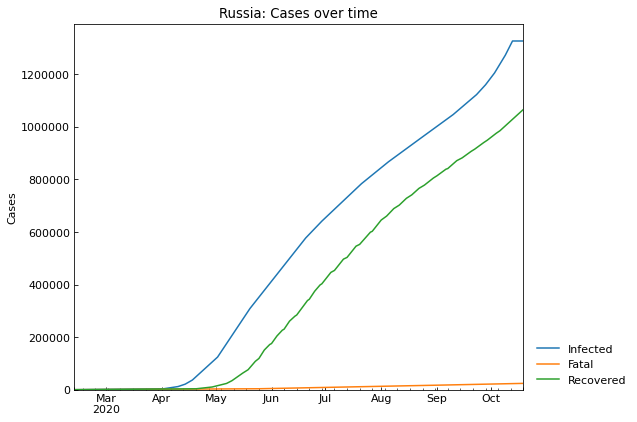

,Date,Confirmed,Infected,Fatal,Recovered
246,2020-10-15,1346380,1326178,23350,1043431
247,2020-10-16,1361317,1326178,23580,1051780
248,2020-10-17,1376020,1326178,23857,1060279
249,2020-10-18,1390824,1326178,24039,1065608
250,2020-10-19,1390824,1326178,24039,1065608


In [25]:
rus_scenario = cs.Scenario(jhu_data, pop_data, "Russia")
rus_scenario.records().tail()

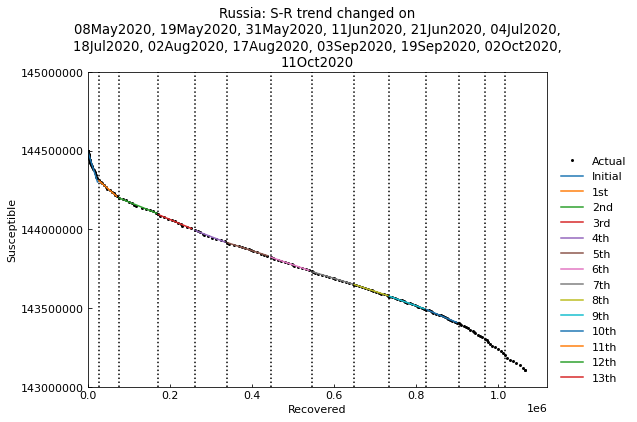

In [26]:
rus_scenario.trend()

In [27]:
rus_scenario.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	13th phase (11Oct2020 - 19Oct2020): finished 1237 trials in 1 min  0 sec
Completed optimization. Total: 5 min 10 sec


In [28]:
rus_scenario.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,alpha1 [-],1/beta [day],1/gamma [day],1/alpha2 [day],RMSLE,Trials,Runtime
0th,Past,12Feb2020,07May2020,144500000,SIR-F,0.10,0.602763,0.544883,0.134650,0.009271,1440,0.603,7,107,1,19.313273,867,1 min 0 sec
1st,Past,08May2020,18May2020,144500000,SIR-F,2.22,0.000920,0.000437,0.043315,0.019038,1440,0.001,23,52,2287,0.107292,874,1 min 0 sec
2nd,Past,19May2020,30May2020,144500000,SIR-F,1.08,0.000234,0.000453,0.024065,0.021884,1440,0.000,41,45,2209,0.132228,875,1 min 0 sec
3rd,Past,31May2020,10Jun2020,144500000,SIR-F,1.01,0.000583,0.000400,0.019637,0.019096,1440,0.001,50,52,2501,0.085622,877,1 min 0 sec
4th,Past,11Jun2020,20Jun2020,144500000,SIR-F,1.15,0.019430,0.000046,0.016154,0.013676,1440,0.019,61,73,21837,0.052826,870,1 min 0 sec
5th,Past,21Jun2020,03Jul2020,144500000,SIR-F,0.82,0.000121,0.000229,0.011330,0.013597,1440,0.000,88,73,4374,0.077723,865,1 min 0 sec
6th,Past,04Jul2020,17Jul2020,144500000,SIR-F,0.84,0.000140,0.000244,0.009164,0.010700,1440,0.000,109,93,4090,0.069228,875,1 min 1 sec
7th,Past,18Jul2020,01Aug2020,144500000,SIR-F,0.77,0.001202,0.000162,0.007387,0.009455,1440,0.001,135,105,6181,0.066433,869,1 min 0 sec
8th,Past,02Aug2020,16Aug2020,144500000,SIR-F,0.87,0.016559,0.000046,0.005789,0.006535,1440,0.017,172,153,21840,0.047563,946,1 min 0 sec
9th,Past,17Aug2020,02Sep2020,144500000,SIR-F,0.77,0.018459,0.000024,0.004990,0.006337,1440,0.018,200,157,41088,0.055031,940,1 min 0 sec


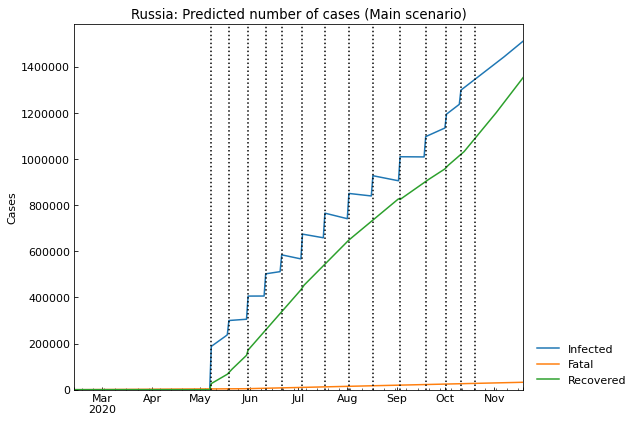

,Date,Confirmed,Fatal,Infected,Recovered
252,2020-10-21 00:00:00,2473985,24833,1351188,1097964
253,2020-10-22 00:00:00,2487854,25075,1356452,1106327
254,2020-10-23 00:00:00,2501774,25317,1361734,1114723
255,2020-10-24 00:00:00,2515748,25560,1367036,1123152
256,2020-10-25 00:00:00,2529776,25805,1372357,1131614
257,2020-10-26 00:00:00,2543855,26050,1377697,1140108
258,2020-10-27 00:00:00,2557988,26296,1383057,1148635
259,2020-10-28 00:00:00,2572175,26543,1388436,1157196
260,2020-10-29 00:00:00,2586416,26791,1393835,1165790
261,2020-10-30 00:00:00,2600710,27040,1399253,1174417


In [43]:
rus_scenario.clear()
rus_scenario.add(days=30)
rus_scenario.simulate().tail(30).style.background_gradient(axis=0)

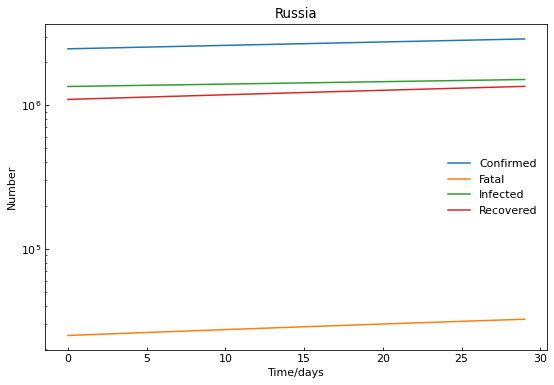

In [60]:
plt.plot(df['rus_confirmed'],label="Confirmed")
plt.plot(df['rus_fatal'],label="Fatal")
plt.plot(df['rus_infected'],label="Infected")
plt.plot(df['rus_recovered'],label="Recovered")
plt.legend(loc="best")
plt.title("Russia")
plt.xlabel("Time/days")
plt.ylabel("Number")
plt.yscale("log")

(0.08564112256129297, 100)

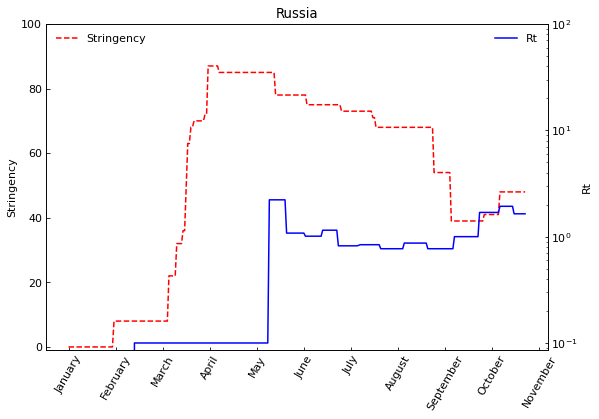

In [53]:
fig,left_axis=plt.subplots()
p1, =left_axis.plot(RUS_str,"--",label="Stringency", color="red")
plt.xticks([0, 30, 60,90,120,150,180,210,240,270,300],['January', 'February', 'March','April','May','June','July','August','September','October','November'],rotation=60)
plt.legend(loc='upper left')
right_axis=left_axis.twinx()
#plt.plot(x_series, AUS_str,label="Stringency", color="red")
#plt.plot(x_series, AUS_Rt, label="Rt", color="blue")
p2, =right_axis.plot(RUS_Rt,label="Rt", color="blue")
plt.legend(loc='upper right')
plt.title("Russia")
left_axis.set_ylabel('Stringency')
left_axis.set_ylim(-1,100)
right_axis.set_ylabel('Rt')
right_axis.set_yscale("log")
right_axis.set_ylim(0,100)